In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wiggle_bin_simulation import simulate

In [9]:
def add_worm_temperature_zones():
    """Add worm comfort and danger temperature zones as horizontal lines to a plot."""
    plt.axhline(35, linestyle='--', color='red', label='Worm Danger Max (35°C)')
    plt.axhline(30, linestyle='--', color='green', label='Worm Comfort Max (30 °C)')
    plt.axhline(15, linestyle='--', color='green', label='Worm Comfort Min (15 °C)')
    plt.axhline(5, linestyle='--', color='orange', label='Worm Slow Down Min (5 °C)')
    plt.axhline(0, linestyle='--', color='red', label='Worm Danger Min (0 °C)')

| Temperature | Impact                                                                                    |
| ----------- | ----------------------------------------------------------------------------------------- |
| **> 35°C**  | **Lethal zone**: Risk of death due to overheating, protein denaturation, oxygen shortage. |
| **30–35°C** | Stressful, reduced activity, possible heat stress.                                        |
| **15–30°C** | ✅ **Optimal range**: Reproduction and composting most active.                             |
| **5–15°C**  | Slower metabolism, but survivable.                                                        |
| **0–5°C**   | Survival possible but with minimal activity. Risk increases with duration.                |
| **< 0°C**   | ❄️ **Danger zone**: Worms usually die unless deeply insulated or burrowed.                |

| Column name | ERA5 variable                       | Description                                                                                 | Units  | Depth (if applicable) |
| ----------- | ----------------------------------- | ------------------------------------------------------------------------------------------- | ------ | --------------------- |
| `t2m`       | `2m_temperature`                    | Air temperature at 2 meters above the surface.                                              | Kelvin | —                     |
| `ssrd`      | `surface_solar_radiation_downwards` | Solar energy reaching the surface per unit area (a measure of sun exposure).                | J/m²   | —                     |
| `stl1`      | `soil_temperature_level_1`          | Soil temperature at layer 1                                                                 | Kelvin | **0–7 cm**            |
| `stl2`      | `soil_temperature_level_2`          | Soil temperature at layer 2                                                                 | Kelvin | **7–28 cm**           |
| `stl3`      | `soil_temperature_level_3`          | Soil temperature at layer 3                                                                 | Kelvin | **28–100 cm**         |
| `soil_type` | `soil_type`                         | Categorical code for soil type (e.g., sand, loam, clay) — not typically used for temp plots | —      | —                     |

In [10]:
import xarray as xr

# Load dataset
hot_summers_temp = xr.open_dataset("emwcf/jul-2015-2018-2019-2020-2022/instant.nc")  # temperatures
hot_summers_rad = xr.open_dataset("emwcf/jul-2015-2018-2019-2020-2022/accum.nc")  # radiation

hot_summers_combined = xr.merge([hot_summers_temp, hot_summers_rad])

# Convert to DataFrame
hot_summers = hot_summers_combined.to_dataframe().reset_index()

# Convert Kelvin to Celsius
hot_summers['temp'] = hot_summers['t2m'] - 273.15
hot_summers['soil_0_7'] = hot_summers['stl1'] - 273.15
hot_summers['sun'] = hot_summers['ssrd'] / 3600

In [11]:
hot_summers = hot_summers.rename(columns={"valid_time": "time"})
hot_summers['month'] = pd.to_datetime(hot_summers['time']).dt.month
hot_summers = hot_summers.set_index('time')

In [12]:
# Ensure index is datetime
hot_summers.index = pd.to_datetime(hot_summers.index)

# Filter for February 2021
jul_2019 = hot_summers.loc['2019-07']
jul_2022 = hot_summers.loc['2022-07']
jul_2015 = hot_summers.loc['2015-07']
jul_2020 = hot_summers.loc['2020-07']
jul_2018 = hot_summers.loc['2018-07']

# Compare bin setups

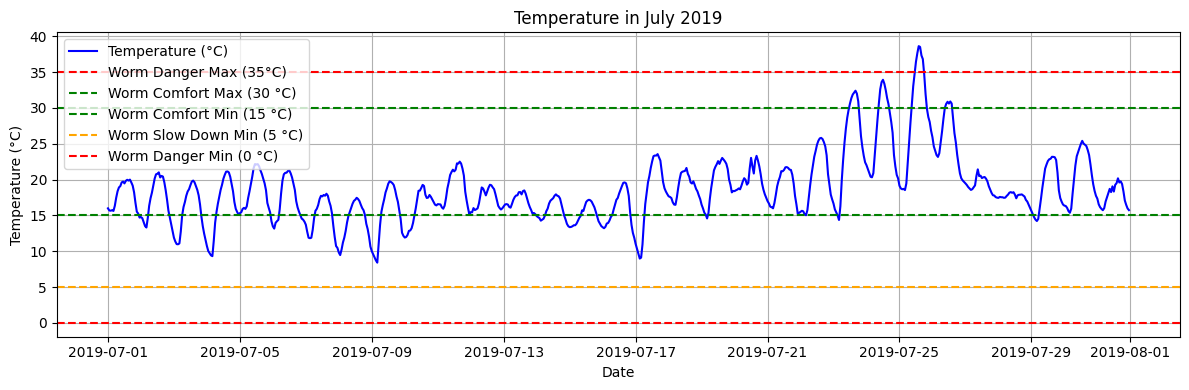

In [13]:
selected_summer = hot_summers.loc['2019-07'].copy()
plt.figure(figsize=(12, 4))
plt.plot(selected_summer.index, selected_summer['temp'], label='Temperature (°C)', color='blue')
add_worm_temperature_zones()
plt.title("Temperature in July 2019")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### White bin in sun

- In shade when it is to hot (option B)
- Opening vent when it is to hot, so air can cool down

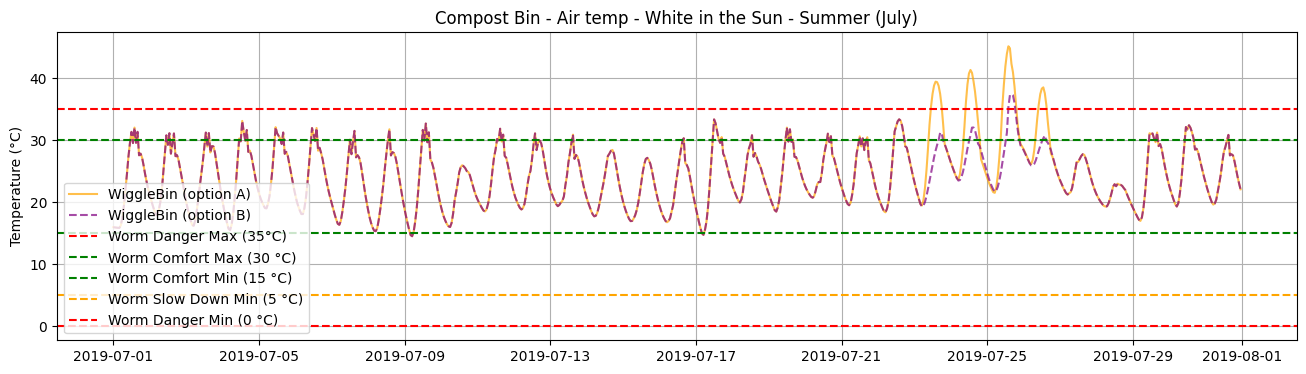

In [36]:
# air ambient
selected_summer['bin_a'] = simulate(
    selected_summer,
    color='white',
    insulation=True,
    auto_venting_lid=True,
)
selected_summer['bin_b'] = simulate(
    selected_summer,
    color='white',
    insulation=True,
    auto_venting_lid=True,
    shade_on_hot_days=True
)

plt.figure(figsize=(16, 4))
# plt.plot(selected_summer.index, selected_summer['temp'], label='Air Temp', color='skyblue')
# plt.plot(selected_summer.index, selected_summer['soil_0_7'], label='Soil Temp', color='brown', linestyle="--", alpha=0.5)
plt.plot(selected_summer.index, selected_summer['bin_a'], label='WiggleBin (option A)', color='orange', alpha=0.7)
plt.plot(selected_summer.index, selected_summer['bin_b'], label='WiggleBin (option B)', color='purple', alpha=0.7, linestyle="--")
plt.title("Compost Bin - Air temp - White in the Sun - Summer (July)")
plt.ylabel("Temperature (°C)")
add_worm_temperature_zones()
plt.legend(loc='lower left')
plt.grid()
plt.show()

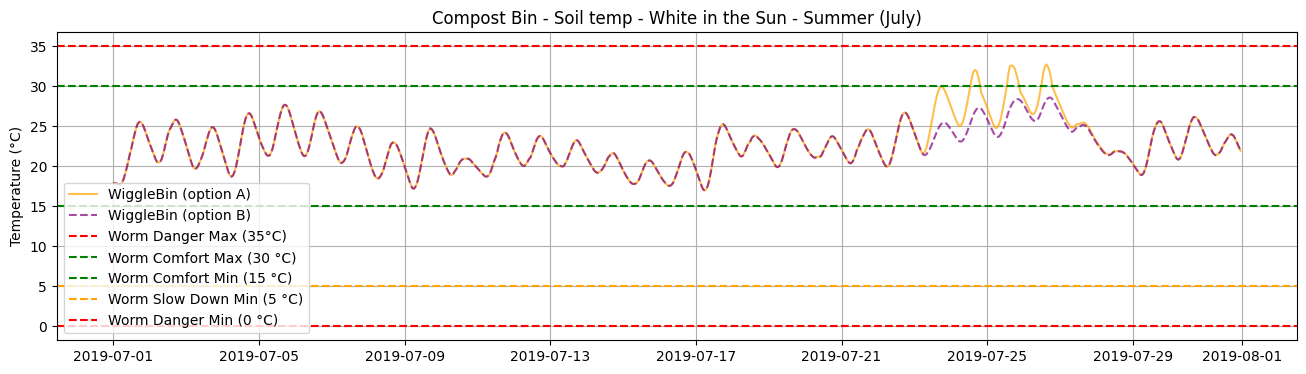

In [37]:
# soil ambient
selected_summer['bin_a'] = simulate(
    selected_summer,
    color='white',
    insulation=True,
    auto_venting_lid=True,
    use_soil_as_ambient=True
)
selected_summer['bin_b'] = simulate(
    selected_summer,
    color='white',
    insulation=True,
    auto_venting_lid=True,
    use_soil_as_ambient=True,
    shade_on_hot_days=True
)

plt.figure(figsize=(16, 4))
# plt.plot(selected_summer.index, selected_summer['temp'], label='Air Temp', color='skyblue')
# plt.plot(selected_summer.index, selected_summer['soil_0_7'], label='Soil Temp', color='brown', linestyle="--", alpha=0.5)
plt.plot(selected_summer.index, selected_summer['bin_a'], label='WiggleBin (option A)', color='orange', alpha=0.7)
plt.plot(selected_summer.index, selected_summer['bin_b'], label='WiggleBin (option B)', color='purple', alpha=0.7, linestyle="--")
plt.title("Compost Bin - Soil temp - White in the Sun - Summer (July)")
plt.ylabel("Temperature (°C)")
add_worm_temperature_zones()
plt.legend(loc='lower left')
plt.grid()
plt.show()